In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from seaborn import regplot
import matplotlib.pyplot as plt


In [2]:
#TODO: Read in Auto-cleaned.csv
df = pd.read_csv('data/Boats_Cleaned_dataset.csv')
df = df.fillna(0)

# delete selected rows with NaN
df =df.drop(df[df['zip']==0].index)
df =df.drop(df[df['engineCategory']==0].index)
df =df.drop(df[df['beam_ft']==0].index)
df =df.drop(df[df['totalHP']==0].index)

# delete selected columns with NaN
df = df.drop(['Unnamed: 0','created_date','id','maxEngineYear','minEngineYear','dryWeight_lb'],axis=1)
df.head(2)
print(df.head(12))
df.shape

     type             boatClass       make                      model  year  \
0   power          power-center  Aquasport                     210 CC  1992   
1   power    power-sportcruiser    Formula            400 Super Sport  2018   
2   power            power-deck   Bayliner                Element 180  2020   
3   power  power-expresscruiser      Regal                 32 Express  2015   
4   power             power-aft     Carver  440 Aft Cabin Motor Yacht  1994   
5   power         power-cruiser     Azimut                         43  2019   
6   power            power-mega     Galeon                    470 SKY  2019   
7   power            power-mega     Galeon                    500 Fly  2019   
8   power       power-flybridge    Johnson         Raised Pilot House  2009   
9   power     power-convertible   Hatteras                Convertible  1971   
10  power     power-convertible   Hatteras                Convertible  1979   
12  power         power-pontoon  Starcraft          

(5765, 20)

In [3]:
# define features and target
X0 = df.drop(['price'], axis=1)
y0 = df.price

# Standardize
X_n = X0.select_dtypes(include='number')
X_c = X0.select_dtypes(exclude='number')
X_n = StandardScaler().set_output(transform='pandas').fit_transform(X_n)

# Hot Encode
X_c = pd.get_dummies(X_c, drop_first = True) #dropped first
df = pd.concat([X_n,X_c,y0],axis=1)
df.head(3)

# Redefine features and target
X = df.drop(['price'],axis=1)
y = df.price
#print(X.describe())
print(X.columns)
print(X.head(10))
print(len(X))

Index(['year', 'length_ft', 'beam_ft', 'numEngines', 'totalHP', 'sellerId',
       'created_month', 'created_year', 'type_sail',
       'boatClass_power-aluminum',
       ...
       'zip_98362', 'zip_98382', 'zip_98402', 'zip_98408', 'zip_98501',
       'zip_98502', 'zip_98516', 'zip_99336', 'zip_99501', 'zip_99508'],
      dtype='object', length=4134)
       year  length_ft   beam_ft  numEngines   totalHP  sellerId  \
0 -2.286818  -0.269861 -0.046811   -0.384842 -0.307611  2.845810   
1  0.357858   1.747749  0.651431    1.744345  1.542000 -0.074647   
2  0.561294  -0.588431 -0.348452   -0.384842 -0.521027  2.905252   
3  0.052703   0.898229  0.464302    1.744345  0.972889 -0.233960   
4 -2.083381   2.172508  1.768620    1.744345  1.257445 -0.519460   
5  0.459576   2.066318  1.466979    1.744345  1.542000 -0.336434   
6  0.459576   2.384888  1.581491    1.744345  2.395667 -0.076016   
7  0.459576   2.809648  3.072938    1.744345  3.078600 -0.076016   
8 -0.557607   8.437716  4.120302 

In [4]:
#Train/Test Split
X_train, X_test,y_train,y_test= train_test_split(X,y,train_size=0.8, random_state=0)

cols = X_train.columns #We'll need to save the column names for the next line
print(X_train.head(2))
print(X_test.head(2))

           year  length_ft   beam_ft  numEngines   totalHP  sellerId  \
12449 -0.049015  -0.357999 -0.208804   -0.384842 -0.023055  0.879070   
14806  0.459576  -0.633031 -0.348452   -0.384842 -0.521027  0.022959   

       created_month  created_year  type_sail  boatClass_power-aluminum  ...  \
12449      -1.530337      0.669316      False                     False  ...   
14806      -0.624392      0.669316      False                     False  ...   

       zip_98362  zip_98382  zip_98402  zip_98408  zip_98501  zip_98502  \
12449      False      False      False      False      False      False   
14806      False      False      False      False      False      False   

       zip_98516  zip_99336  zip_99501  zip_99508  
12449      False      False      False      False  
14806      False      False      False      False  

[2 rows x 4134 columns]
           year  length_ft   beam_ft  numEngines   totalHP  sellerId  \
13682  0.357858  -1.411403 -1.420953   -0.384842 -0.449888 -0.2

In [5]:
# Simple linear regressor
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_train,y_train)
lr.score(X_test,y_test)

-7.132538120456488e+17

In [6]:
def EvaluateR2(model,candidates,X_train,y_train,R2_test,R2_train):
    features = model.copy()
    n = 0
    nums = [n]
    while n< len(candidates)-1:
        n=n+1
        nums.append(n)
        # fit regressor and evaluate R2
        features.append(candidates[n])
        lr.fit(X_train[features],y_train)
        if lr.score(X_test[features],y_test) <R2_test[-1]:
            features.remove(candidates[n])
        else:
            lrBest = LinearRegression()
            lrBest.fit(X_train[features],y_train)
            R2_train.append(lrBest.score(X_train[features],y_train))
            R2_test.append(lrBest.score(X_test[features],y_test))
           
        print(R2_test[-1])
        
    return (lrBest,features, nums,R2_test,R2_train,R2_test[-1],R2_train[-1])
        

In [7]:
candidates = list(X_train.columns)
R2_test=[]
R2_train=[]
model = [candidates[0]]
candidates.remove(candidates[0])
lr = LinearRegression()
lr.fit(X_train[model],y_train)
R2_train.append(lr.score(X_train[model],y_train))
R2_test.append(lr.score(X_test[model],y_test))
(lrBest,featuresBest, nums,R2_test,R2_train,lastTest, lastTrain) = EvaluateR2(model,candidates,X_train,y_train,R2_test,R2_train)


0.21573519694622245
0.3720097542561165
0.6056093219016669
0.6056093219016669
0.6059695091831622
0.6066689851381726
0.6284173575672253
0.6284173575672253
0.6333435491228221
0.6333435491228221
0.6333435491228221
0.6337172247344837
0.6337204378859327
0.6348474828469793
0.6352550047092019
0.6352550047092019
0.6352550047092019
0.635335968089559
0.6354320659979433
0.6354320659979433
0.6431529185923178
0.6431529185923178
0.6514710420576868
0.6515745732472629
0.6515745732472629
0.6515745732472629
0.6515766731964658
0.6519621832737081
0.6519621832737081
0.652000808926991
0.66610620828562
0.6670576537111946
0.6670576537111946
0.667061554350014
0.6673982438042114
0.6681754543140557
0.6681754543140557
0.6684916607833703
0.6684916607833703
0.6684916607833703
0.6684916607833703
0.6685439310537671
0.6685595019826436
0.6685595019826436
0.6685595019826436
0.6723391405413063
0.6723440113843335
0.6723440113843335
0.6723806161026074
0.6724685472069494
0.6725187300143188
0.6725633406211305
0.67263474770252

     iteration      test     train
0            0  0.010737  0.008267
1            1  0.215735  0.140949
2            2  0.372010  0.277391
3            3  0.605609  0.593476
4            4  0.605970  0.593604
..         ...       ...       ...
165        165  0.706023  0.683954
166        166  0.706029  0.683959
167        167  0.706029  0.683960
168        168  0.706029  0.683960
169        169  0.706071  0.684002

[170 rows x 3 columns]


<Axes: xlabel='iteration'>

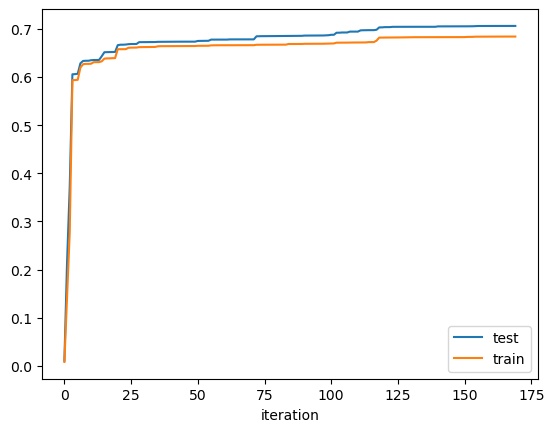

In [8]:
# R2
R2 = pd.DataFrame()
R2['iteration']=nums[0:len(R2_test)-1]
R2['test'] = R2_test[0:len(R2_test)-1]
R2['train'] = R2_train[0:len(R2_train)-1]
print(R2)
R2.plot.line(x='iteration',y=['test','train'])

In [9]:
print(len(featuresBest))
print(len(lrBest.coef_))

171
171


In [10]:
print(np.argmax(lrBest.coef_))
lrBest.coef_[np.argmax(lrBest.coef_)]
featuresBest[np.argmax(lrBest.coef_)]

118


'make_Johnson'

In [11]:
coeffs = pd.Series(lrBest.coef_,featuresBest)
print(coeffs)

year                    47446.465425
beam_ft                  9804.875310
numEngines             -20672.221125
totalHP                172747.880249
created_month             707.257436
                           ...      
model_Targa V-20 WT    -23773.328741
model_VS1782 WT          8348.069282
city_Lebanon             1522.791210
state_AZ               -14632.624717
zip_40701                -819.130372
Length: 171, dtype: float64
